# DL Lab Assignment - LSTM

**Course Name:** Deep Learning ( PEC )

**Lab Title:** LSTM Lab Assignment

**Student Name:** Vaibhav Satish JAdhav

**Student ID:** 202201040024

**Group Members**: 1. Md Yaseen 2.Vidya Bingi , 3. Om Borle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import math


Objective:To forecast future values of a univariate time series using LSTM-based models.

             Date  btc_market_price  btc_total_bitcoins  btc_market_cap  \
0  2/17/2010 0:00               0.0           2043200.0             0.0   
1  2/18/2010 0:00               0.0           2054650.0             0.0   
2  2/19/2010 0:00               0.0           2063600.0             0.0   
3  2/20/2010 0:00               0.0           2074700.0             0.0   
4  2/21/2010 0:00               0.0           2085400.0             0.0   

   btc_trade_volume  btc_blocks_size  btc_avg_block_size  \
0               0.0              0.0            0.000235   
1               0.0              0.0            0.000241   
2               0.0              0.0            0.000228   
3               0.0              0.0            0.000218   
4               0.0              0.0            0.000234   

   btc_n_orphaned_blocks  btc_n_transactions_per_block  \
0                      0                           1.0   
1                      0                           1.0   
2             

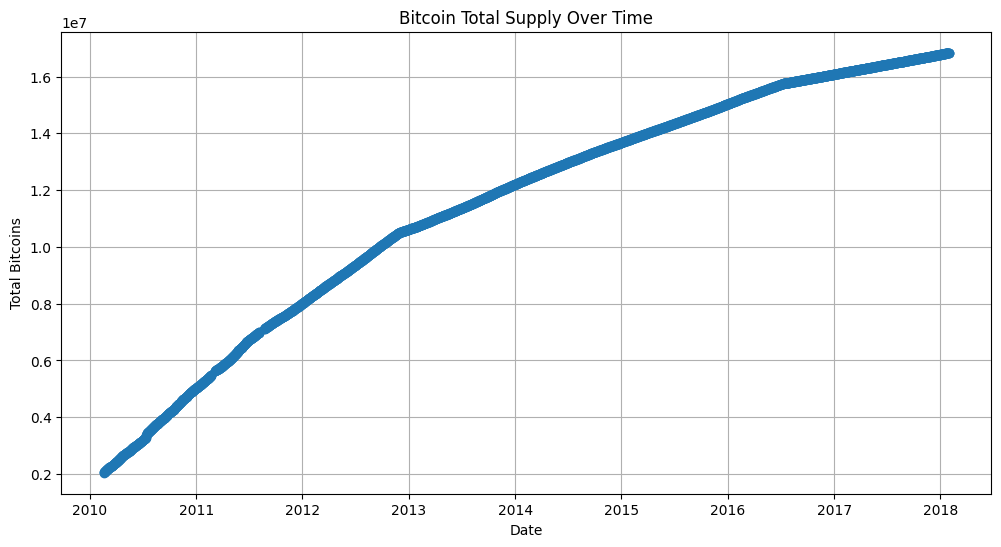

In [ ]:
import pandas as pd

# Load the CSV file
# Replace 'your_file.csv' with your actual file name
df = pd.read_csv('/content/bitcoin_dataset.csv')

# Display the first few rows
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Example: Plot Bitcoin Total Supply over time
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['btc_total_bitcoins'], marker='o')
plt.title('Bitcoin Total Supply Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bitcoins')
plt.grid(True)
plt.show()


In [ ]:
# Drop 'Date' column before scaling
df_numeric = df.drop(columns=['Date'])

# Normalize only the numeric columns
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_numeric)

print("Data normalized using MinMaxScaler.")

Data normalized using MinMaxScaler.


In [ ]:
# Function to create time series sequences
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i-seq_len:i])   # last 'seq_len' items
        y.append(data[i])             # predict the next one
    return np.array(X), np.array(y)

# Set sequence length
seq_len = 30
X, y = create_sequences(data_scaled, seq_len)

print("Sequence length used for LSTM:", seq_len)
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Sequence length used for LSTM: 30
Input shape: (2876, 30, 23)
Output shape: (2876, 23)


In [ ]:
# Train-test split (using custom split without sklearn for sequence consistency)
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print("Train/Test split ratio: 80/20")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

Train/Test split ratio: 80/20
Training samples: 2300
Testing samples: 576


In [ ]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_len, X_train.shape[2])),
    LSTM(50),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 30, 50)         │        14,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,051 (136.92 KB)

 Trainable params: 35,051 (136.92 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)

print("Model training complete.")

Epoch 1/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: nan - val_loss: nan
Epoch 2/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: nan - val_loss: nan
Epoch 3/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: nan - val_loss: nan
Epoch 4/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: nan - val_loss: nan
Epoch 5/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: nan - val_loss: nan
Epoch 6/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: nan - val_loss: nan
Epoch 7/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: nan - val_loss: nan
Epoch 8/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: nan - val_loss: nan
Epoch 9/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: nan - val_loss: nan
Epoch 10/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: nan - val_loss: nan
Epoch 11/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: nan - val_loss: nan
Epoch 12/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: nan - val_loss: nan
Epoch 13/30
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/st

X_test shape: (576, 30, 23)
y_test shape: (576, 23)
y_pred shape: (576, 1)
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


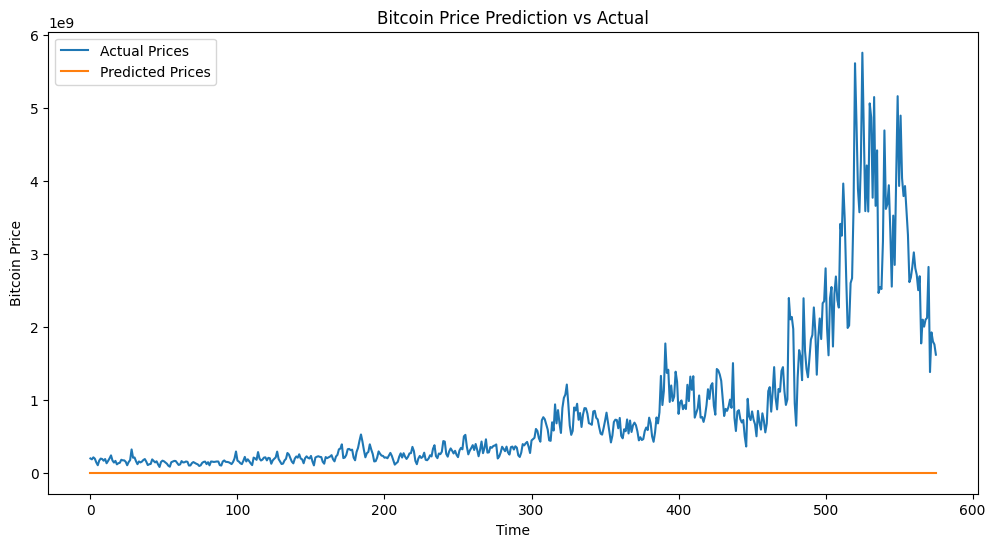

In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)

# Make predictions
y_pred = model.predict(X_test)

# Extract the target column (Bitcoin Price) from y_test, assuming it's the last column
y_test_target = y_test[:, -1].reshape(-1, 1)  # Taking only the last column (target)

# Reshape y_test to match the shape of the scaled data for inverse transformation
# Create a dummy array with the same number of features as df_numeric
y_test_scaled = np.zeros((y_test_target.shape[0], df_numeric.shape[1]))  # Create an array with the same number of features
y_test_scaled[:, -1] = y_test_target.reshape(-1)  # Place the target (Bitcoin price) data in the last column

# Inverse transform the results (both y_test and y_pred)
y_test_inv = scaler.inverse_transform(y_test_scaled)[:, -1]  # Only take the last column (target)
y_pred_inv = scaler.inverse_transform(np.hstack([y_pred, np.zeros((y_pred.shape[0], df_numeric.shape[1] - 1))]))[:, -1]  # Append zeros to match the shape and take last column

# Plot predictions vs actual
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Prices')
plt.plot(y_pred_inv, label='Predicted Prices')
plt.title('Bitcoin Price Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()

In [ ]:
# Calculate evaluation metrics
rmse = math.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Squared Error (RMSE): 1372500754.6188874
Mean Absolute Error (MAE): 860344072.1656945
